In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


notas = pd.read_csv('https://raw.githubusercontent.com/celsocrivelaro/simple-datasets/main/notas-estudantes.csv')
#notas = notas.to_csv('notas.csv')

notas

,nota_1,nota_2,resultado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [7]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = (notas['resultado'] == 0)
    pos = (notas['resultado'] == 1)
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][["nota_1"]], data[pos][["nota_2"]], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][["nota_1"]], data[neg][["nota_2"]], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

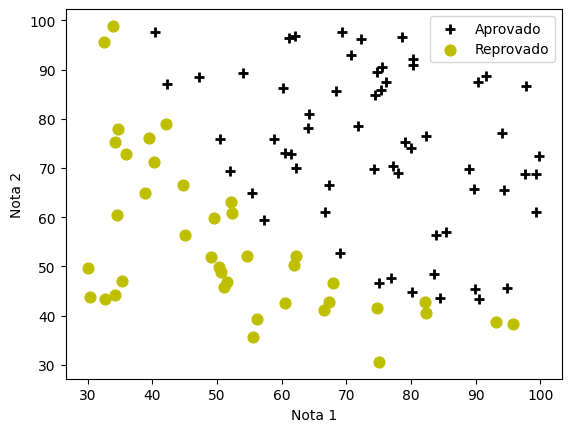

In [8]:
plotData(notas, 'Nota 1', 'Nota 2', 'Aprovado', 'Reprovado')

In [9]:

def sigmoide(x1,x2,a,b,c):
  return 1.0 / 1 + (math.exp(-(x1*a+x2*b+c)))

In [10]:
def crossEntropy(N, sig, y):
    for i in N:
        logLoss = -1/N * (math.sum(y*math.log(sig)) + (1-y)* math.log(1-sig))
    return logLoss


In [ ]:
# Função de predição
def predicao(x, a, b):
  return (a * x) + b

In [ ]:
# Função de perda
def erro_quadratico_medio(y, p):
	return np.sum((y-p)**2) / len(y)

In [ ]:
# Método de aprendizado Gradient Descent
# Hiperparâmetros iteracoes, alfa, limite_parada
def gradient_descent(x, y, iteracoes = 1000, alfa = 0.0001, limite_parada = 1e-6):
	
	# inicializando valores
	a = 0.1
	b = 0.01
	n = float(len(x))
	
	perdas = []
	variacoes_a = []
	perda_anterior = float('inf')
	
	for i in range(iteracoes):
		
		# Fazendo a predição com a e b atuais
		p = (a * x) + b
		
		# Cálculo do valor de perda
		perda_atual = erro_quadratico_medio(y, p)

		# Para se a diferença da perda 
		if abs(perda_anterior - perda_atual) <= limite_parada:
			return a, b, perdas, variacoes_a
		
		perda_anterior = perda_atual

		perdas.append(perda_atual)
		variacoes_a.append(a)
		
		# Cálculo do gradiente
		derivida_a = -(2/n) * sum(x * (y-p))
		derivida_b = -(2/n) * sum(y-p)
		
		a = a - (alfa * derivida_a)
		b = b - (alfa * derivida_b)
	
	return a, b, perdas, variacoes_a